In [1]:
import pandas as pd
import numpy as np
import scipy.special as sc
import matplotlib as m
import matplotlib.pyplot as plt

#### What if we take all consistently inconsistent genes out of the data and perform the WT-WT control, do we still get DEG hits?

#### What if we take only consistently inconsistent genes in the data and perform the WT-WT control, how many hits do we end up with?

In [2]:
# control experiment

# 10 reps, 100 iterations 
# samples from ONLY WT!

In [3]:
# load WT-WT control experiment data

# all bayexpress results
# 10 replicates
# BF_21 > 1

CONTROL_R10_bayexpress_FC0 = pd.read_csv(f'DGE_results/CONTROL_R10_1_bayexpress.csv').iloc[:,1:2]
CONTROL_R10_bayexpress_FC1 = pd.read_csv(f'DGE_results/CONTROL_R10_1_bayexpress.csv').iloc[:,1:2]
CONTROL_R10_bayexpress_FC2 = pd.read_csv(f'DGE_results/CONTROL_R10_1_bayexpress.csv').iloc[:,1:2]

for i in range(1,101):

    data = pd.read_csv(f'DGE_results/CONTROL_R10_{i}_bayexpress.csv').iloc[:,1:]

    # criteria 0 for significance: (BF_21 > 1) & (abs(FC) > 0)
    CONTROL_R10_bayexpress_FC0[f'{i}'] = (data.BF_21 > 1) & (abs(data.FC) > 0)

    # criteria 1 for significance: (BF_21 > 1) & (abs(FC) > 1)
    CONTROL_R10_bayexpress_FC1[f'{i}'] = (data.BF_21 > 1) & (abs(data.FC) > 1)

    # criteria 2 for significance: (BF_21 > 1) & (abs(FC) > 2)
    CONTROL_R10_bayexpress_FC2[f'{i}'] = (data.BF_21 > 1) & (abs(data.FC) > 2)

CONTROL_R10_bayexpress_FC0['Ntrue'] = [(CONTROL_R10_bayexpress_FC0.iloc[i].value_counts().get(True, 0)) for i in range(len(CONTROL_R10_bayexpress_FC0))]

CONTROL_R10_bayexpress_FC1['Ntrue'] = [(CONTROL_R10_bayexpress_FC1.iloc[i].value_counts().get(True, 0)) for i in range(len(CONTROL_R10_bayexpress_FC1))]

CONTROL_R10_bayexpress_FC2['Ntrue'] = [(CONTROL_R10_bayexpress_FC2.iloc[i].value_counts().get(True, 0)) for i in range(len(CONTROL_R10_bayexpress_FC2))]

display(CONTROL_R10_bayexpress_FC0)
display(CONTROL_R10_bayexpress_FC1)
display(CONTROL_R10_bayexpress_FC2)

/var/folders/dl/6r82c34d3pbdmnyfpk1l0ff00000gn/T/ipykernel_86792/1778804861.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CONTROL_R10_bayexpress_FC0[f'{i}'] = (data.BF_21 > 1) & (abs(data.FC) > 0)
/var/folders/dl/6r82c34d3pbdmnyfpk1l0ff00000gn/T/ipykernel_86792/1778804861.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CONTROL_R10_bayexpress_FC1[f'{i}'] = (data.BF_21 > 1) & (abs(data.FC) > 1)
/var/folders/dl/6r82c34d3pbdmnyfpk1l0ff00000gn/T/ipykernel_86792/1778804861.py:22: PerformanceWarning: DataFrame is highly fra

,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
0,15S_rRNA,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,15
1,21S_rRNA,False,True,False,True,True,False,True,False,True,...,True,True,False,False,True,False,True,False,True,53
2,HRA1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,ICR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,LSR1,False,True,False,False,False,False,False,False,True,...,True,True,False,False,True,False,True,False,True,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7122,tY(GUA)M1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7123,tY(GUA)M2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7124,tY(GUA)O,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
0,15S_rRNA,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,15
1,21S_rRNA,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,10
2,HRA1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,ICR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,LSR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7122,tY(GUA)M1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7123,tY(GUA)M2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7124,tY(GUA)O,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
0,15S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,21S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,HRA1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,ICR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,LSR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7122,tY(GUA)M1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7123,tY(GUA)M2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7124,tY(GUA)O,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [4]:
# load data from all replicate comparisons which contains lists of consistently inconsistent genes (AOTP)

RALL_bayexpress = pd.read_csv('RALL_bayexpress.csv', index_col=0)


# the column AOTP_WT informs whether the genes is marked as consistently inconsistent (True) or not (False) in the wild type yeast data

RALL_bayexpress

,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


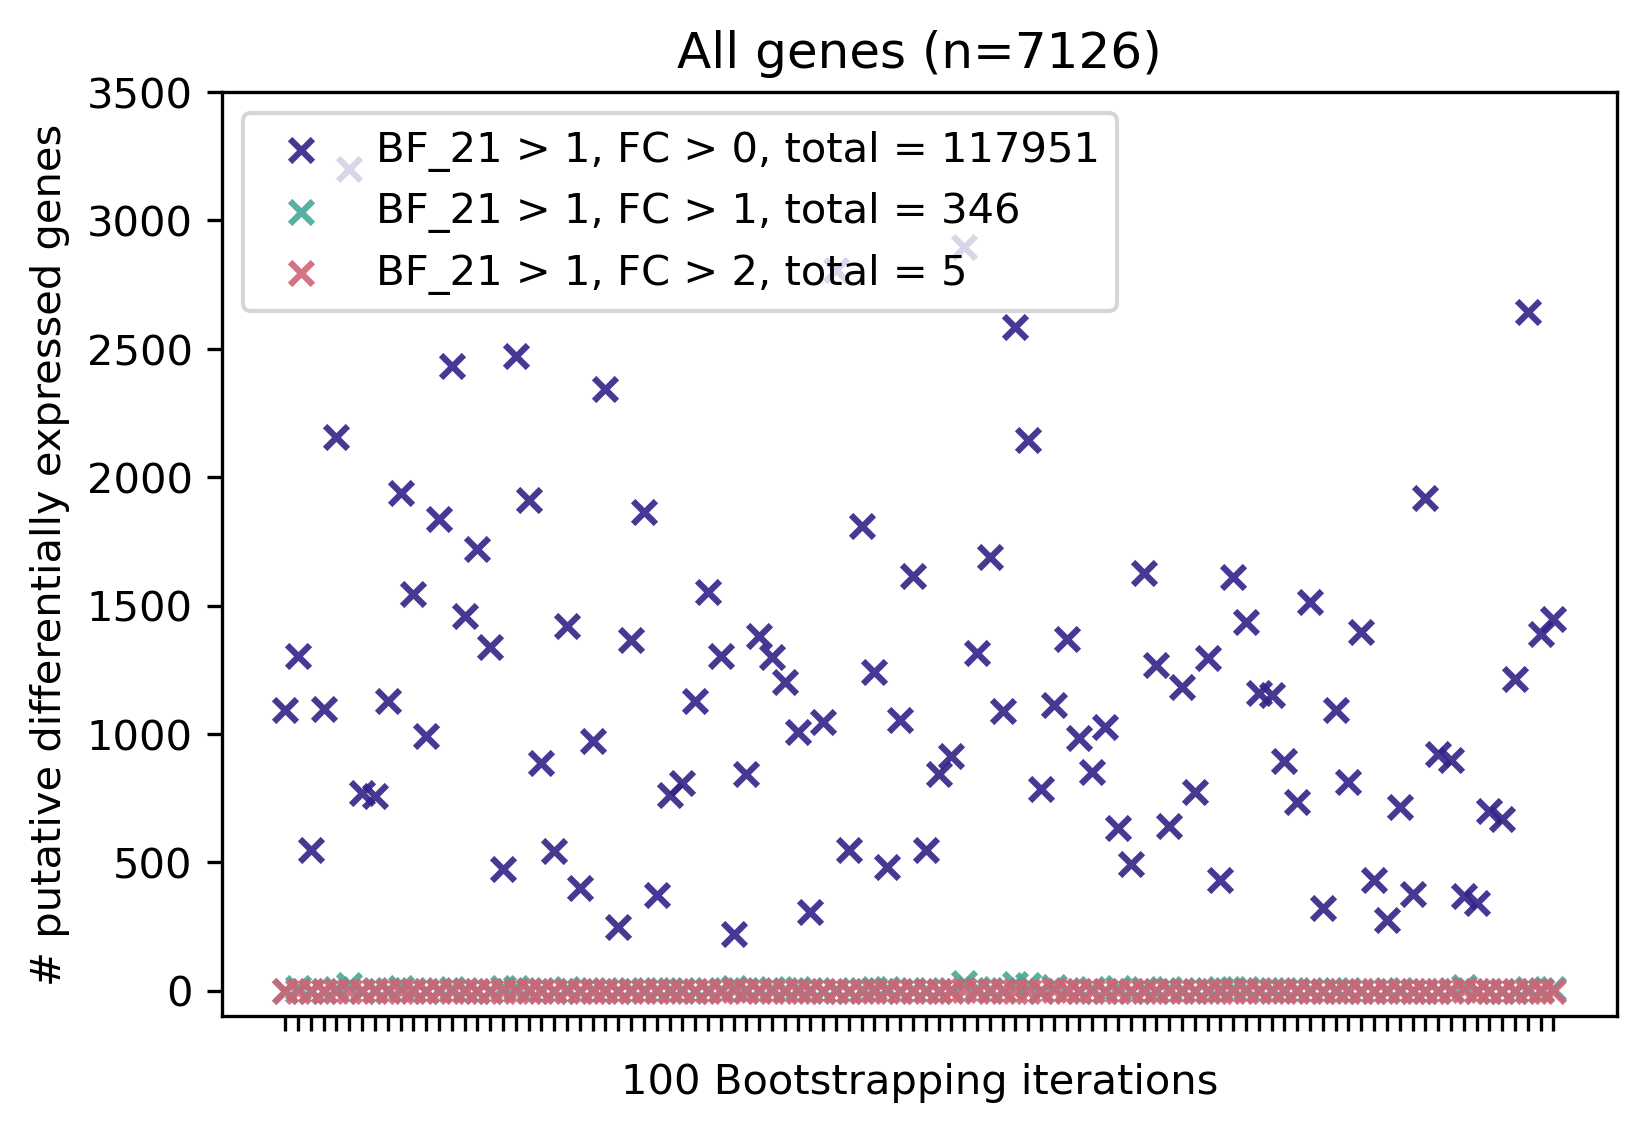

In [5]:
# regular plot, all genes included

fig, axs = plt.subplots(1, 1, sharey=True, figsize=(6, 4), dpi=300)

# scatters
axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC0.iloc[:, 1:-1].sum(axis=0),
            c='#332288', s=30,
            label=f'BF_21 > 1, FC > 0, total = {sum(CONTROL_R10_bayexpress_FC0.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC1.iloc[:, 1:-1].sum(axis=0),
            c='#44AA99', s=30,
            label=f'BF_21 > 1, FC > 1, total = {sum(CONTROL_R10_bayexpress_FC1.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC2.iloc[:, 1:-1].sum(axis=0),
            c='#CC6677', s=30,
            label=f'BF_21 > 1, FC > 2, total = {sum(CONTROL_R10_bayexpress_FC2.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.legend(loc='upper left')

# Use tex in labels
axs.set_xticks(np.arange(1, 101))
axs.set_xticklabels('')

# formatting y axis ticks
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

axs.set_xlabel('100 Bootstrapping iterations')
axs.set_ylabel('# putative differentially expressed genes')

# Set y limit 3500
axs.set_ylim(-100, 3500)

plt.title('All genes (n=7126)')

plt.show()


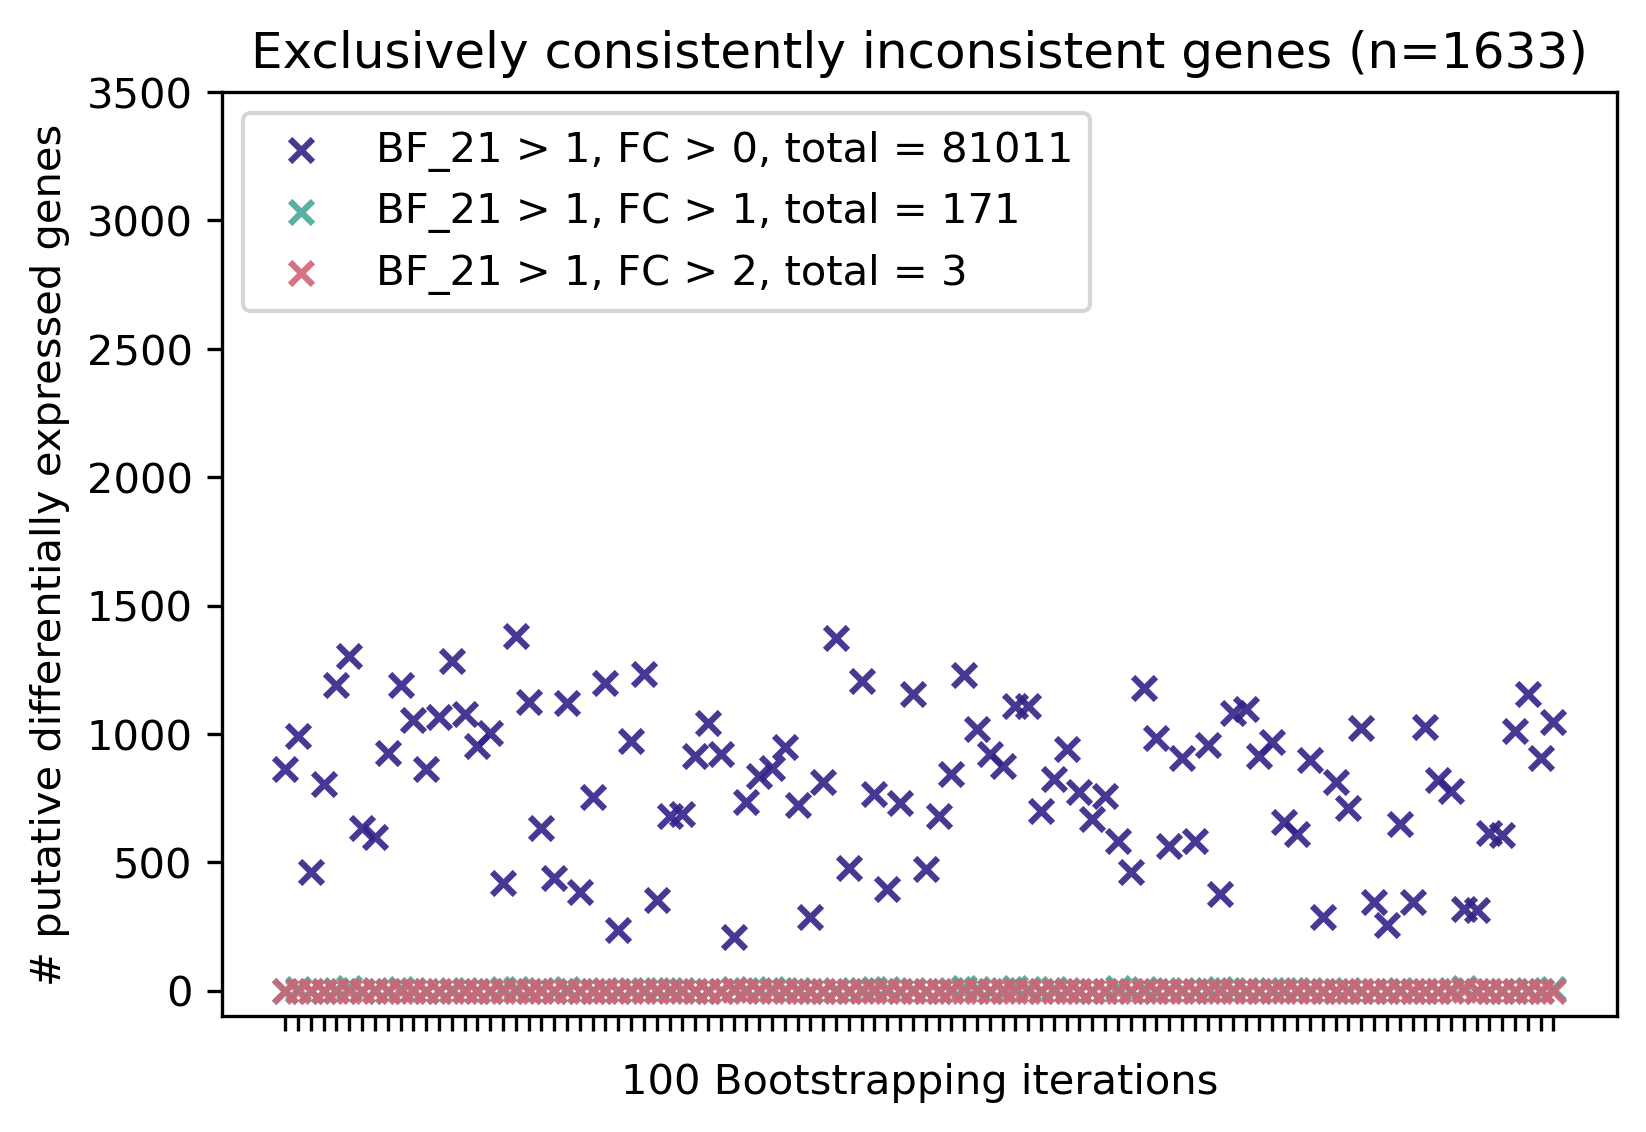

,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
41,RDN5-1,13.774601,0.316040,246.914584,True,521.186933,True
46,RDN5-6,15.230943,0.469612,172.850686,True,347.304031,True
56,RUF5-1,-1.191579,0.080133,232.720615,True,4.230186,True
...,...,...,...,...,...,...,...
6731,YPR191W,218.989419,0.279871,251.986788,True,-38.705868,False
6745,YPR204W,814.266672,0.541523,-1.746145,True,37.268866,True
6752,snR17a,7.383833,0.329308,28.421292,True,239.879652,True
6761,snR30,20.556922,0.159709,2.616569,True,85.355966,True


In [6]:
# only consistently inconsistent genes in the plot

fig, axs = plt.subplots(1, 1, sharey=True, figsize=(6, 4), dpi=300)

# scatters
axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC0.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == True].locus_name)].iloc[:, :-1].sum(axis=0),
            c='#332288', s=30,
            label=f'BF_21 > 1, FC > 0, total = {sum(CONTROL_R10_bayexpress_FC0.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == True].locus_name)].iloc[:, :-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC1.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == True].locus_name)].iloc[:, :-1].sum(axis=0),
            c='#44AA99', s=30,
            label=f'BF_21 > 1, FC > 1, total = {sum(CONTROL_R10_bayexpress_FC1.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == True].locus_name)].iloc[:, :-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC2.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == True].locus_name)].iloc[:, :-1].sum(axis=0),
            c='#CC6677', s=30,
            label=f'BF_21 > 1, FC > 2, total = {sum(CONTROL_R10_bayexpress_FC2.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == True].locus_name)].iloc[:, :-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.legend(loc='upper left')

# Use tex in labels
axs.set_xticks(np.arange(1, 101))
axs.set_xticklabels('')

# formatting y axis ticks
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

axs.set_xlabel('100 Bootstrapping iterations')
axs.set_ylabel('# putative differentially expressed genes')

# Set y limit 3500
axs.set_ylim(-100, 3500)

plt.title('Exclusively consistently inconsistent genes (n=1633)')


plt.show()


display(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == True])

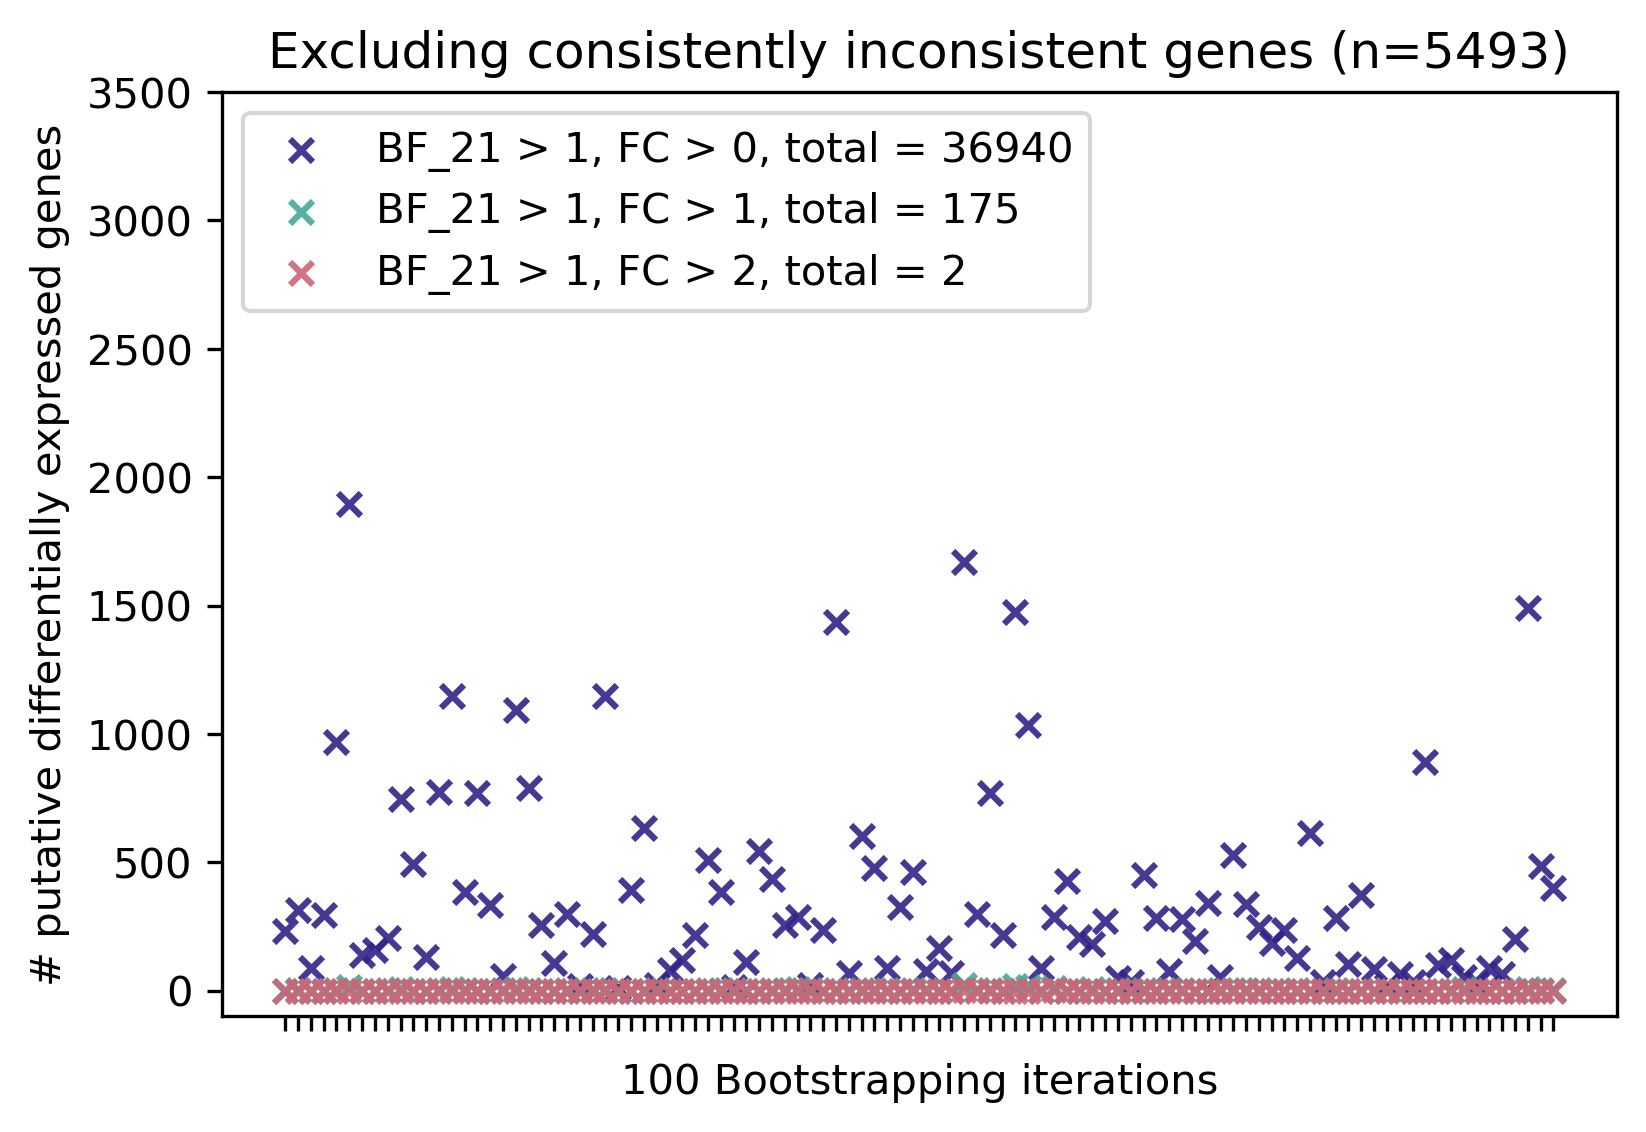

,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
5,NME1,-0.117540,0.325530,-194.522309,False,-176.114481,False
6,PWR1,-8.273720,-0.138161,-275.349735,False,-289.991744,False
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


In [7]:
# excluding consistently inconsistent genes from the plot

fig, axs = plt.subplots(1, 1, sharey=True, figsize=(6, 4), dpi=300)

# scatters
axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC0.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == False].locus_name)].iloc[:, :-1].sum(axis=0),
            c='#332288', s=30,
            label=f'BF_21 > 1, FC > 0, total = {sum(CONTROL_R10_bayexpress_FC0.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == False].locus_name)].iloc[:, :-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC1.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == False].locus_name)].iloc[:, :-1].sum(axis=0),
            c='#44AA99', s=30,
            label=f'BF_21 > 1, FC > 1, total = {sum(CONTROL_R10_bayexpress_FC1.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == False].locus_name)].iloc[:, :-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R10_bayexpress_FC2.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == False].locus_name)].iloc[:, :-1].sum(axis=0),
            c='#CC6677', s=30,
            label=f'BF_21 > 1, FC > 2, total = {sum(CONTROL_R10_bayexpress_FC2.set_index('locus_name').loc[list(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == False].locus_name)].iloc[:, :-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.legend(loc='upper left')

# Use tex in labels
axs.set_xticks(np.arange(1, 101))
axs.set_xticklabels('')

# formatting y axis ticks
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

axs.set_xlabel('100 Bootstrapping iterations')
axs.set_ylabel('# putative differentially expressed genes')

# Set y limit 3500
axs.set_ylim(-100, 3500)


plt.title('Excluding consistently inconsistent genes (n=5493)')


plt.show()


display(RALL_bayexpress.loc[RALL_bayexpress.AOTP_WT == False])
